In [127]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import glob
from sklearn.cluster import KMeans

In [387]:
def read_all_weeks():
    unsupervised_datasets_path = r'C:\Users\hladn\FAKS\eestech challenge\unsupervised_dataset'
    li = []

    for week in range(100):
        filename = unsupervised_datasets_path + r"\scenario_week_example_" + str(week) + r".csv"
        #print(filename)
        df = pd.read_csv(filename, parse_dates=['ds'])
        df['ds'] = df['ds'] + datetime.timedelta(days=week*7)
        li.append(df)

    frame = pd.concat(li, axis=0, ignore_index=True)
    return frame

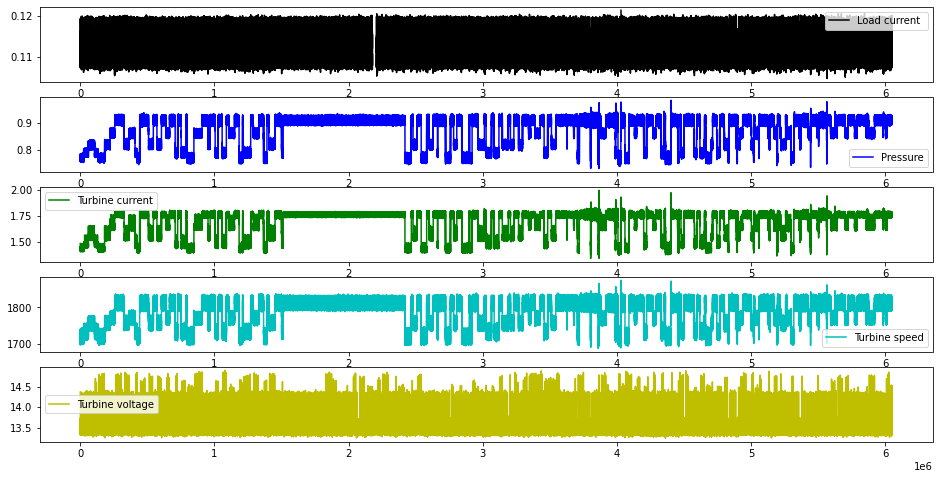

In [388]:
df_all_weeks = read_all_weeks()
visualise_week(df_all_weeks)

In [398]:
# clustering  and pca aon full data
from sklearn.cluster import MiniBatchKMeans
all_columns = ['Load current ', 'Pressure', 'Turbine current', 'Turbine speed', 'Turbine voltage']
columns_smooth = ['Load current_sm', 'Pressure_sm', 'Turbine current_sm', 'Turbine speed_sm', 'Turbine voltage_sm']
columns = columns_smooth#['Pressure',  'Turbine speed']


def preprocess_df(df_week):

    window = 5
    df_week["Pressure_sm"] = df_week["Pressure"].rolling(window=window).mean().fillna(method='bfill')
    df_week["Load current_sm"] = df_week["Load current "].rolling(window=window).mean().fillna(method='bfill')
    df_week["Turbine current_sm"] = df_week["Turbine current"].rolling(window=window).mean().fillna(method='bfill')
    df_week["Turbine voltage_sm"] = df_week["Turbine voltage"].rolling(window=window).mean().fillna(method='bfill')
    df_week["Turbine speed_sm"] = df_week["Turbine speed"].rolling(window=window).mean().fillna(method='bfill')

    return df_week 
df_all_weeks = preprocess_df(df_all_weeks)
print("preprocessing_done")

df_all_weeks = df_all_weeks.sample(frac=0.1)


print("clustering done")

def visualise_PCA(df_week, columns):
    pca = PCA(n_components=2)
    pca.fit(df_week[columns])


    pca = PCA(n_components=2)
    components = pca.fit_transform(df_week[columns])

    plt.scatter(components[:, 0], components[:, 1],
                c=df_week['cluster_label'])
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    

visualise_PCA(df_all_weeks)

def get_clusters(df_week, columns):
    kmeans = KMeans(n_clusters=2, random_state=0, verbose=1).fit(df_week[columns])
    #kmeans = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=4000, verbose = 1).fit(df_week[columns])
    df_week['cluster_label'] = kmeans.labels_
    df_week['cluster_label'] = df_week['cluster_label'].rolling(window=80).apply(lambda x: mode(x)[0]).fillna(method='bfill')
    return df_week

    
df_all_weeks = get_clusters(df_all_weeks, columns_smooth)
    

print("PCA done")

preprocessing_done
Initialization complete
Iteration 0, inertia 655302.2605467138
Iteration 1, inertia 504331.1884161551
Iteration 2, inertia 492503.4219361572
Iteration 3, inertia 488531.5846400624
Iteration 4, inertia 487066.4692979991
Iteration 5, inertia 486509.33221373404
Iteration 6, inertia 486220.8408242822
Iteration 7, inertia 486063.19856502005
Iteration 8, inertia 486008.75847822125
Converged at iteration 8: center shift 0.0035273624040462557 within tolerance 0.004721937533293401.
Initialization complete
Iteration 0, inertia 696873.6267639095
Iteration 1, inertia 488727.0735688998
Iteration 2, inertia 487019.09706408373
Iteration 3, inertia 486386.28417996236
Iteration 4, inertia 486145.9707244369
Iteration 5, inertia 486040.2652443057
Iteration 6, inertia 486005.54509844485
Converged at iteration 6: center shift 0.002265209579457531 within tolerance 0.004721937533293401.
Initialization complete
Iteration 0, inertia 659803.3691770589
Iteration 1, inertia 493362.315773958
Ite

TypeError: visualise_PCA() missing 1 required positional argument: 'columns'

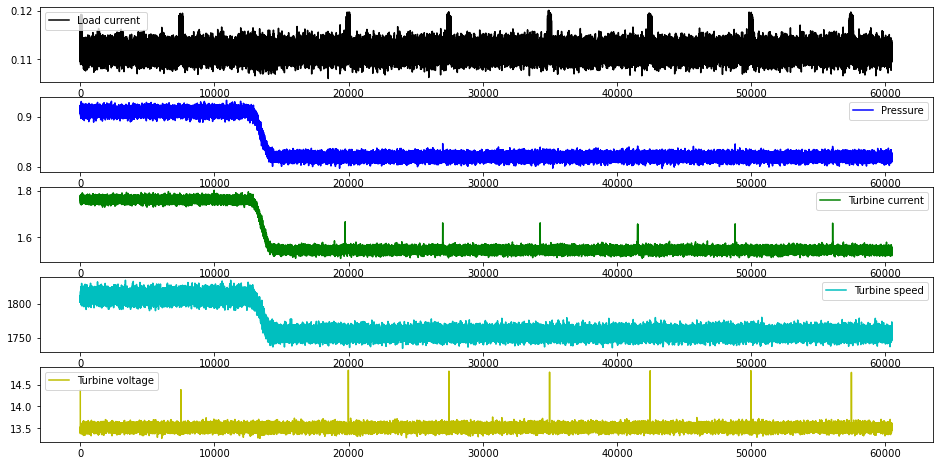

In [459]:
week_id = 23
def read_df_week(week_id):
    single_week_path = r"C:\Users\hladn\FAKS\eestech challenge\unsupervised_dataset\scenario_week_example_"+ str(week_id) + r".csv"
    df_week = pd.read_csv(single_week_path, index_col=None, header=0)
    return df_week
df_week = read_df_week(week_id)

def visualise_week(df_week):
    fig = plt.figure(figsize=(16,8))
    plt.subplot(511)
    df_week["Load current "].plot(legend=True, color='k')
    plt.subplot(512)
    df_week["Pressure"].plot(legend=True, color='b')
    plt.subplot(513)
    df_week["Turbine current"].plot(legend=True, color='g')
    plt.subplot(514)
    df_week["Turbine speed"].plot(legend=True, color='c')
    plt.subplot(515)
    df_week["Turbine voltage"].plot(legend=True, color='y')
visualise_week(df_week)

## preprocess

In [460]:

def preprocess_df(df_week):

    window = 5
    df_week["Pressure_sm"] = df_week["Pressure"].rolling(window=window).mean().fillna(method='bfill')
    df_week["Load current_sm"] = df_week["Load current "].rolling(window=window).mean().fillna(method='bfill')
    df_week["Turbine current_sm"] = df_week["Turbine current"].rolling(window=window).mean().fillna(method='bfill')
    df_week["Turbine voltage_sm"] = df_week["Turbine voltage"].rolling(window=window).mean().fillna(method='bfill')
    df_week["Turbine speed_sm"] = df_week["Turbine speed"].rolling(window=window).mean().fillna(method='bfill')

    return df_week 
df_week = preprocess_df(df_week)
df_week

,ds,Load current,Pressure,Turbine current,Turbine speed,Turbine voltage,Pressure_sm,Load current_sm,Turbine current_sm,Turbine voltage_sm,Turbine speed_sm
0,2022-03-01 00:00:00,0.110056,0.914014,1.747397,1802.820301,14.371693,0.917195,0.111820,1.768462,13.599136,1804.081691
1,2022-03-01 00:00:10,0.109497,0.913663,1.782052,1804.994367,13.379807,0.917195,0.111820,1.768462,13.599136,1804.081691
2,2022-03-01 00:00:20,0.109720,0.923690,1.770858,1802.344452,13.463560,0.917195,0.111820,1.768462,13.599136,1804.081691
3,2022-03-01 00:00:30,0.118820,0.914835,1.765202,1802.268999,13.377316,0.917195,0.111820,1.768462,13.599136,1804.081691
4,2022-03-01 00:00:40,0.111006,0.919771,1.776799,1807.980336,13.403302,0.917195,0.111820,1.768462,13.599136,1804.081691
...,...,...,...,...,...,...,...,...,...,...,...
60475,2022-03-07 23:59:10,0.112909,0.820909,1.536112,1760.123192,13.512035,0.821488,0.111665,1.543684,13.528246,1755.947264
60476,2022-03-07 23:59:20,0.111330,0.813566,1.532894,1751.139677,13.552312,0.820405,0.111789,1.541096,13.548848,1755.443565
60477,2022-03-07 23:59:30,0.112028,0.809707,1.537816,1759.724468,13.540406,0.818055,0.111838,1.539655,13.536156,1757.071503
60478,2022-03-07 23:59:40,0.111751,0.812215,1.540884,1747.764615,13.528550,0.816422,0.111773,1.539358,13.531636,1753.162120


## clustering

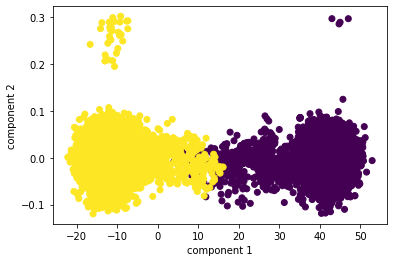

In [461]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
from scipy.stats import mode

all_columns = ['Load current ', 'Pressure', 'Turbine current', 'Turbine speed', 'Turbine voltage']
columns_smooth = ['Load current_sm', 'Pressure_sm', 'Turbine current_sm', 'Turbine speed_sm', 'Turbine voltage_sm']
columns = columns_smooth#['Pressure',  'Turbine speed']


def get_clusters(df_week, columns):
    kmeans = KMeans(n_clusters=2, random_state=0).fit(df_week[columns])
    df_week['cluster_label'] = kmeans.labels_
    df_week['cluster_label'] = df_week['cluster_label'].rolling(window=80).apply(lambda x: mode(x)[0]).fillna(method='bfill')
    return df_week

df_week = get_clusters(df_week, columns_smooth)


def visualise_PCA(df_week):
    pca = PCA(n_components=2)
    pca.fit(df_week[columns])


    pca = PCA(n_components=2)
    components = pca.fit_transform(df_week[columns])

    plt.scatter(components[:, 0], components[:, 1],
                c=df_week['cluster_label'])
    plt.xlabel('component 1')
    plt.ylabel('component 2')

visualise_PCA(df_week)

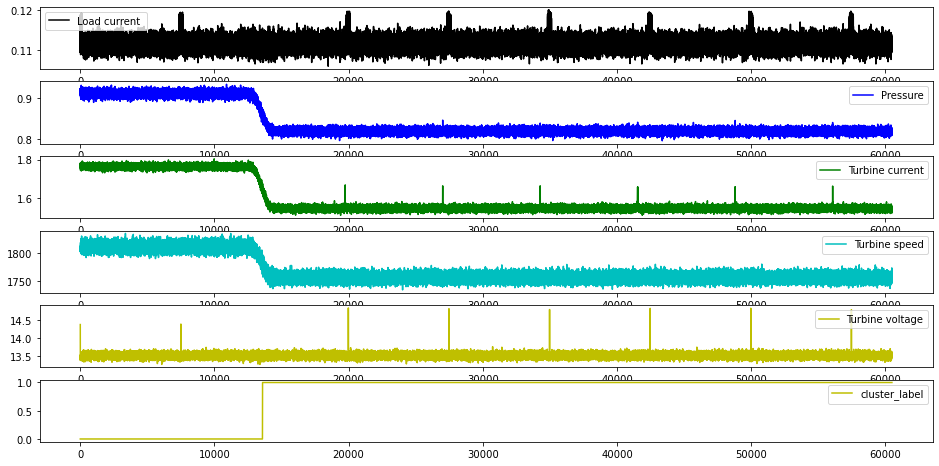

In [462]:

def visualise_detected_clusters(dw_week):
    fig = plt.figure(figsize=(16,8))
    plt.subplot(611)
    df_week["Load current "].plot(legend=True, color='k')
    plt.subplot(612)
    df_week["Pressure"].plot(legend=True, color='b')
    plt.subplot(613)
    df_week["Turbine current"].plot(legend=True, color='g')
    plt.subplot(614)
    df_week["Turbine speed"].plot(legend=True, color='c')
    plt.subplot(615)
    df_week["Turbine voltage"].plot(legend=True, color='y')
    plt.subplot(616)
    df_week["cluster_label"].plot(legend=True, color='y')
visualise_detected_clusters(df_week)

## get leakage label based on threshold

In [433]:
def add_leakage_labels_based_on_pressure(df_week):

    df_week["leakage"] = 0
    df_week.loc[df_week.Pressure_sm < 0.85, 'leakage'] = 1

    return df_week
#df_week = add_leakage_labels_based_on_pressure(df_week)

## change to correct (leakage (1) vs non-leakage (0))
leakage is where pressure is smaller

In [463]:
def add_leakage_labels(df_week):
    df_label_group = df_week.groupby(by="cluster_label", dropna=True).mean().reset_index()
    if float(df_label_group.loc[df_label_group.cluster_label==1]["Pressure"]) < float(df_label_group.loc[df_label_group.cluster_label==0]["Pressure"]):
        #print("labels are ok")
        df_week["leakage"] = df_week["cluster_label"]
    else:
        df_week["leakage"] = df_week["cluster_label"].replace({1:0, 0:1})
        #print("switch kmeans labels")

    return df_week

df_week = add_leakage_labels(df_week)
df_week 

,ds,Load current,Pressure,Turbine current,Turbine speed,Turbine voltage,Pressure_sm,Load current_sm,Turbine current_sm,Turbine voltage_sm,Turbine speed_sm,cluster_label,leakage
0,2022-03-01 00:00:00,0.110056,0.914014,1.747397,1802.820301,14.371693,0.917195,0.111820,1.768462,13.599136,1804.081691,0.0,0.0
1,2022-03-01 00:00:10,0.109497,0.913663,1.782052,1804.994367,13.379807,0.917195,0.111820,1.768462,13.599136,1804.081691,0.0,0.0
2,2022-03-01 00:00:20,0.109720,0.923690,1.770858,1802.344452,13.463560,0.917195,0.111820,1.768462,13.599136,1804.081691,0.0,0.0
3,2022-03-01 00:00:30,0.118820,0.914835,1.765202,1802.268999,13.377316,0.917195,0.111820,1.768462,13.599136,1804.081691,0.0,0.0
4,2022-03-01 00:00:40,0.111006,0.919771,1.776799,1807.980336,13.403302,0.917195,0.111820,1.768462,13.599136,1804.081691,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60475,2022-03-07 23:59:10,0.112909,0.820909,1.536112,1760.123192,13.512035,0.821488,0.111665,1.543684,13.528246,1755.947264,1.0,1.0
60476,2022-03-07 23:59:20,0.111330,0.813566,1.532894,1751.139677,13.552312,0.820405,0.111789,1.541096,13.548848,1755.443565,1.0,1.0
60477,2022-03-07 23:59:30,0.112028,0.809707,1.537816,1759.724468,13.540406,0.818055,0.111838,1.539655,13.536156,1757.071503,1.0,1.0
60478,2022-03-07 23:59:40,0.111751,0.812215,1.540884,1747.764615,13.528550,0.816422,0.111773,1.539358,13.531636,1753.162120,1.0,1.0


## get number of changes

In [445]:
def get_leakages_end_periods(df_week):
    df_week["change_of_state"] = df_week["leakage"].diff().fillna(0)
    end_periods = df_week.loc[(df_week['change_of_state'] != 0)].index.tolist()
    leakages = []
    end_periods_seconds = []
    if len(end_periods) > 100:
        # TODO: naredi za primer ko je samo en cluster - samo eno stanje, trenutno hardcodan stanje no leak (0)
        
        if df_week["Pressure_sm"].mean() > 0.85:
            leakages.append(0)
        else:
            leakages.append(1)
        end_periods_seconds.append(604800)
    elif len(end_periods) ==0:
        leakages.append(int(df_week["leakage"].loc[df_week.index == 5]))
        end_periods_seconds.append(604800)
    else:
        for end_period in end_periods:
            leakages.append(int(df_week["leakage"].loc[df_week.index == end_period-1]))
            end_periods_seconds.append(end_period*10)
    return leakages, end_periods_seconds

get_leakages_end_periods(df_week)


([0], [604800])

In [309]:
df_week["change_of_state"].loc[df_week["change_of_state"]==1]

41925    1.0
Name: change_of_state, dtype: float64

## pipeline 

In [464]:
columns_smooth = ['Load current_sm', 'Pressure_sm', 'Turbine current_sm', 'Turbine speed_sm', 'Turbine voltage_sm']
week_id = 26 # 26 is a file without state change between 0.9 and 0.92 pressure, file 14 has 1 state, pressure between 0.84 and 0.88
df_week = read_df_week(week_id)
#visualise_week(df_week)
df_week = preprocess_df(df_week)
df_week = get_clusters(df_week, columns_smooth)

df_week = add_leakage_labels(df_week)

leakages, end_periods_seconds = get_leakages_end_periods(df_week)

print(f' leakages: {leakages} \n end_periods_seconds: {end_periods_seconds}')

 leakages: [0] 
 end_periods_seconds: [604800]


In [367]:
[end_periods_seconds]

[603330]

## predict ohase 1 for all files

In [446]:
%%time
import json 
def get_phase1_result_for_all_files():
    unsupervised_datasets_path = r'C:\Users\hladn\FAKS\eestech challenge\unsupervised_dataset'
    prediction_results = []

    for week in range(100):
        filename = unsupervised_datasets_path + r"\scenario_week_example_" + str(week) + r".csv"
        name = r"scenario_week_example_" + str(week) + r".csv"
        print(name)
        columns_smooth = ['Load current_sm', 'Pressure_sm', 'Turbine current_sm', 'Turbine speed_sm', 'Turbine voltage_sm']
        df_week = read_df_week(week)
        df_week = preprocess_df(df_week)
        df_week = get_clusters(df_week, columns_smooth)

        df_week = add_leakage_labels(df_week)


        leakages, end_periods_seconds = get_leakages_end_periods(df_week)
        
        prediction_results.append({
            "file_name" : name,
            "end_periods": end_periods_seconds,
            "leakages": leakages
        })
    
    json_results = {"prediction_results" : prediction_results}
    with open("results_phase1.json", "w") as outfile:
        json.dump(json_results, outfile)
get_phase1_result_for_all_files()

scenario_week_example_0.csv
scenario_week_example_1.csv
scenario_week_example_2.csv
scenario_week_example_3.csv
scenario_week_example_4.csv
scenario_week_example_5.csv
scenario_week_example_6.csv
scenario_week_example_7.csv
scenario_week_example_8.csv
scenario_week_example_9.csv
scenario_week_example_10.csv
scenario_week_example_11.csv
scenario_week_example_12.csv
scenario_week_example_13.csv
scenario_week_example_14.csv
scenario_week_example_15.csv
scenario_week_example_16.csv
scenario_week_example_17.csv
scenario_week_example_18.csv
scenario_week_example_19.csv
scenario_week_example_20.csv
scenario_week_example_21.csv
scenario_week_example_22.csv
scenario_week_example_23.csv
scenario_week_example_24.csv
scenario_week_example_25.csv
scenario_week_example_26.csv
scenario_week_example_27.csv
scenario_week_example_28.csv
scenario_week_example_29.csv
scenario_week_example_30.csv
scenario_week_example_31.csv
scenario_week_example_32.csv
scenario_week_example_33.csv
scenario_week_example_34

In [ ]:
# correct end_periods in json